In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.cluster import KMeans

In [223]:
tweets = pd.read_csv('../data/twitter_api_pulls.csv')
twitter_handles = pd.read_csv('../data/twitter_handles.csv')

In [224]:
followers = pd.read_csv('../data/follower_count.csv')

In [225]:
dao = pd.read_json('../data/boardroom_dao.json', lines=True)
proposals = pd.read_json('../data/dao_proposals.json', lines=True)
tr_bal = pd.read_json('../data/dao_treasury_balance.json', lines=True)
tok_bal = pd.read_json('../data/dao_treasury_token_balance.json', lines=True)
tr_tran = pd.read_json('../data/dao_treasury_transactions.json', lines=True)
vote = pd.read_json('../data/vote.json', lines=True)

In [226]:
temp = []
for i in tweets['tweets']:
    result = re.sub(r'http[^ ]+','', str(i))
    temp.append(result)

tweets['tweets'] = temp

In [227]:
temp = []
for i in tweets['tweets']:
    result = re.sub(r'amp[^ ]+','', i)
    temp.append(result)

tweets['tweets'] = temp

In [228]:
tokenizer = RegexpTokenizer('\w+')

In [229]:
text_tokenized = [tokenizer.tokenize(i.lower())for i in tweets['tweets']]
tweets['tokenized_text'] = text_tokenized

In [230]:
tweets = tweets[~tweets['tweets'].str.startswith('RT')]

In [231]:
tweets = tweets.reset_index()

In [232]:
tweets.head()

level_0  index screen_name  \
0        0      0    1HiveOrg   
1        1      2    1HiveOrg   
2        2      3    1HiveOrg   
3        3      4    1HiveOrg   
4        4      5    1HiveOrg   

                                              tweets  likes  retweets  \
0  1HTV's @vegaypatino shares his perspective on ...      4         1   
1  1HTV is LIVE! 🐝 📺\n\nJoin us for DAOspace news...     11         4   
2  1HTV Monday Stream tomorrow at 11am ET! 📺\n\n-...     18         8   
3  2 hours left!\n\nOur Gnosis Auction is wrappin...     10         3   
4  The bees are stoked for next week! 🔥\n\nTY for...     16         5   

                        time  \
0  2022-02-14 18:59:56+00:00   
1  2022-02-14 16:00:01+00:00   
2  2022-02-13 22:09:15+00:00   
3  2022-02-11 21:10:00+00:00   
4  2022-02-11 20:30:00+00:00   

                                      tokenized_text  \
0  [1htv, s, vegaypatino, shares, his, perspectiv...   
1  [1htv, is, live, join, us, for, daospace, news...   
2  [1htv, monday, stream, tomorrow, at, 11am, et,...   
3  [2, hours, left, our, gnosis, auction, is, wra...   
4  [the, bees, are, stoked, for, next, week, ty, ...   

                               joined_tokenized_text  
0  1htv s vegaypatino shares his perspective on f...  
1  1htv is live join us for daospace news a chat ...  
2  1htv monday stream tomorrow at 11am et daospac...  
3  2 hours left our gnosis auction is wrapping up...  
4  the bees are stoked for next week ty for the a...

In [233]:
def join_vect(df, col):
    joined = []
    for i in df[f'{col}']:
        joined.append(" ". join(i))
    df[f'joined_{col}'] = joined
    return df

In [234]:
join_vect(tweets, 'tokenized_text')
cv = CountVectorizer(stop_words='english')

In [235]:
tweet_vect = cv.fit_transform(tweets['joined_tokenized_text'])
tweet_vect_tt = pd.DataFrame(tweet_vect.todense(), columns=cv.get_feature_names())

<AxesSubplot:>

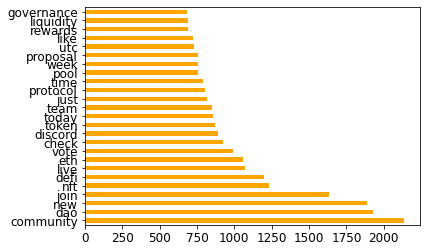

In [236]:
tweet_vect_tt.sum().sort_values(ascending=False).head(25).plot(kind='barh', fontsize=12, color = 'orange')

In [237]:
columns = ['dao', 'daos', 'vote', 'proposal', 'proposals', 'governance', 'voting', 'voter', 'votes', 'govern', 'governing']

In [238]:
tweet_vect_tt.head()

00  000  000003613  000005  0001  000177  0002  0002ξ  0005  000ft  ...  \
0   0    0          0       0     0       0     0      0     0      0  ...   
1   0    0          0       0     0       0     0      0     0      0  ...   
2   0    0          0       0     0       0     0      0     0      0  ...   
3   0    0          0       0     0       0     0      0     0      0  ...   
4   0    0          0       0     0       0     0      0     0      0  ...   

   𝙏𝙬𝙞𝙣  𝙐𝙋𝘿𝘼𝙏𝙀𝙎  𝙗𝙮  𝙝𝙤𝙬  𝙞𝙨  𝙣𝙤  𝙨𝙪𝙗𝙨𝙩𝙞𝙩𝙪𝙩𝙚𝙨  𝙩𝙤  𝟬𝟬𝟬  𝟭𝟬  
0     0        0   0    0   0   0            0   0    0   0  
1     0        0   0    0   0   0            0   0    0   0  
2     0        0   0    0   0   0            0   0    0   0  
3     0        0   0    0   0   0            0   0    0   0  
4     0        0   0    0   0   0            0   0    0   0  

[5 rows x 28805 columns]

In [239]:
key_words_tweets = tweet_vect_tt[columns]
key_words_tweets.head()

dao  daos  vote  proposal  proposals  governance  voting  voter  votes  \
0    0     0     0         0          0           0       0      0      0   
1    0     0     0         0          0           0       0      0      0   
2    0     0     0         0          0           0       0      0      0   
3    0     0     0         0          0           0       0      0      0   
4    0     0     0         0          0           0       0      0      0   

   govern  governing  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0

In [240]:
key_words_tweets['sum'] = key_words_tweets.sum(axis=1)
key_words_tweets = key_words_tweets[key_words_tweets['sum']>=1]
key_words_tweets['tweet_index'] = key_words_tweets.index

<ipython-input-240-7d4e8f4936c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_words_tweets['sum'] = key_words_tweets.sum(axis=1)


In [241]:
t_index = list(key_words_tweets['tweet_index'])

In [242]:
final_keywords_df = tweets.iloc[t_index]

In [243]:
final_keywords_df.head()

level_0  index screen_name  \
11       11     16    1HiveOrg   
17       17     24    1HiveOrg   
19       19     26    1HiveOrg   
31       31     46    1HiveOrg   
35       35     54    1HiveOrg   

                                               tweets  likes  retweets  \
11  Have you visited @ShapeShift_io DAO's new dapp...     23        11   
17  Do you want to see $FOX on the Agave Platform?...     11         3   
19  We have been getting hundreds of DMs lately as...      9         1   
31  It's is always great when good products come i...     13         6   
35  Did you know @ensdomains DAO recently conclude...     17         4   

                         time  \
11  2022-02-03 18:30:00+00:00   
17  2022-02-01 12:31:54+00:00   
19  2022-01-31 15:24:03+00:00   
31  2022-01-23 07:20:54+00:00   
35  2022-01-20 20:00:00+00:00   

                                       tokenized_text  \
11  [have, you, visited, shapeshift_io, dao, s, ne...   
17  [do, you, want, to, see, fox, on, the, agave, ...   
19  [we, have, been, getting, hundreds, of, dms, l...   
31  [it, s, is, always, great, when, good, product...   
35  [did, you, know, ensdomains, dao, recently, co...   

                                joined_tokenized_text  
11  have you visited shapeshift_io dao s new dapp ...  
17  do you want to see fox on the agave platform i...  
19  we have been getting hundreds of dms lately as...  
31  it s is always great when good products come i...  
35  did you know ensdomains dao recently concluded...

In [244]:
likes = final_keywords_df[['screen_name', 'likes']]
likes = likes.groupby(['screen_name']).sum()
likes = likes.reset_index()

In [245]:
followers.head()

screen_name  follower_count
0    1HiveOrg            6665
1       1inch         1015150
2         1UP           62175
3    AaveAave          428464
4  aavegotchi           92203

In [246]:
like_follower = pd.merge(likes, followers, on='screen_name')

In [247]:
df_total = tweets['screen_name'].value_counts().rename_axis('screen_name').reset_index(name='tweet_count')

In [248]:
final_keywords_df['screen_name'].value_counts()

financedotvote     146
compoundfinance    104
MakerDao           101
xdaoapp             97
nowdaoit            92
                  ... 
CorgisCrypto         1
FLAMINGODAO          1
PoolTogether_        1
PleasrDAO            1
nounsdao             1
Name: screen_name, Length: 172, dtype: int64

In [249]:
df = final_keywords_df['screen_name'].value_counts().rename_axis('screen_name').reset_index(name='key_word_tweet_count')

In [250]:
name_dict = pd.Series(twitter_handles['name'].values, twitter_handles['twitter_handle']).to_dict()

In [251]:
df['screen_name'] = df['screen_name'].replace(name_dict)

In [252]:
df_total['screen_name'] = df_total['screen_name'].replace(name_dict)

In [253]:
like_follower['screen_name'] = like_follower['screen_name'].replace(name_dict)

In [254]:
df = pd.merge(df, df_total, on='screen_name')

In [255]:
df['key_word_ratio'] = df['key_word_tweet_count']/df['tweet_count']

In [256]:
df = df.sort_values(by='key_word_ratio', ascending=False)

In [257]:
like_follower.head()

screen_name  likes  follower_count
0    1HiveLLC    478            6665
1       1inch   1214         1015150
2      BitDAO   4710           34385
3     Airalab    319           28222
4        API3   1360           37523

In [258]:
like_follower.shape

(171, 3)

In [259]:
df = pd.merge(df, like_follower, on='screen_name')

In [260]:
df['like_follower_ratio'] = df['likes']/df['follower_count']

In [261]:
df = df[df['key_word_tweet_count']>=10]

In [262]:
df.to_csv('../data/keyword_tweet_count.csv')

In [263]:
df['screen_name'].value_counts()

Buzzed Bear Hideout      1
Uniswap                  1
Instadapp                1
MetaCartel DAO           1
Meter Governance MTRG    1
                        ..
DAOSquare                1
Lido                     1
Yam Finance              1
CityDAO                  1
Unslashed                1
Name: screen_name, Length: 111, dtype: int64

In [264]:
df.head()

screen_name  key_word_tweet_count  tweet_count  key_word_ratio  likes  \
1  Finance.Vote                   146          180        0.811111   1249   
2      Compound                   104          132        0.787879   7354   
3      OceanDAO                    25           33        0.757576    448   
5          XDAO                    97          159        0.610063   1329   
6      Collab19                    15           25        0.600000     44   

   follower_count  like_follower_ratio  
1            7025             0.177794  
2          218838             0.033605  
3            1988             0.225352  
5            6174             0.215258  
6              52             0.846154

In [265]:
twitter_handles

name twitter_handle                       twitter_url
0         1HiveLLC       1HiveOrg      https://twitter.com/1HiveOrg
1            1inch          1inch         https://twitter.com/1inch
2              1UP            1UP           https://twitter.com/1UP
3             Aave       AaveAave      https://twitter.com/AaveAave
4       Aavegotchi     aavegotchi    https://twitter.com/aavegotchi
..             ...            ...                               ...
190           XDAO        xdaoapp       https://twitter.com/xdaoapp
191    Yam Finance     YamFinance    https://twitter.com/YamFinance
192  Yearn Finance   iearnfinance  https://twitter.com/iearnfinance
193         yfBeta         yfBeta        https://twitter.com/yfBeta
194            Yup         yup_io        https://twitter.com/yup_io

[195 rows x 3 columns]

In [266]:
twitter_merge = pd.merge(twitter_handles, followers,  how='left', left_on='twitter_handle', right_on = 'screen_name')

In [267]:
twitter_merge.drop(columns = 'screen_name', inplace = True)

In [268]:
twitter_merge

name twitter_handle                       twitter_url  \
0         1HiveLLC       1HiveOrg      https://twitter.com/1HiveOrg   
1            1inch          1inch         https://twitter.com/1inch   
2              1UP            1UP           https://twitter.com/1UP   
3             Aave       AaveAave      https://twitter.com/AaveAave   
4       Aavegotchi     aavegotchi    https://twitter.com/aavegotchi   
..             ...            ...                               ...   
190           XDAO        xdaoapp       https://twitter.com/xdaoapp   
191    Yam Finance     YamFinance    https://twitter.com/YamFinance   
192  Yearn Finance   iearnfinance  https://twitter.com/iearnfinance   
193         yfBeta         yfBeta        https://twitter.com/yfBeta   
194            Yup         yup_io        https://twitter.com/yup_io   

     follower_count  
0            6665.0  
1         1015150.0  
2           62175.0  
3          428464.0  
4           92203.0  
..              ...  
190          6174.0  
191         25296.0  
192        182864.0  
193          1630.0  
194          6544.0  

[195 rows x 4 columns]

In [269]:
twitter_dao = pd.merge(twitter_merge, dao,  how='left', left_on='name', right_on = 'name')

In [270]:
twitter_dao_final = twitter_dao.dropna().reset_index()

In [271]:
twitter_dao_final.drop(columns = 'index', inplace=True)

In [272]:
twitter_dao_final.to_csv('../data/twitter_dao_final.csv', index=False)

In [273]:
twitter_dao_final

name  twitter_handle                         twitter_url  \
0        1inch           1inch           https://twitter.com/1inch   
1         Aave        AaveAave        https://twitter.com/AaveAave   
2   Aavegotchi      aavegotchi      https://twitter.com/aavegotchi   
3   Ampleforth   AmpleforthOrg   https://twitter.com/AmpleforthOrg   
4        Armor         ArmorFi         https://twitter.com/ArmorFi   
..         ...             ...                                 ...   
58      Vesper        VesperFi        https://twitter.com/VesperFi   
59       Visor    VisorFinance    https://twitter.com/VisorFinance   
60        WGMI  wgmi4thepeople  https://twitter.com/wgmi4thepeople   
61      yfBeta          yfBeta          https://twitter.com/yfBeta   
62         Yup          yup_io          https://twitter.com/yup_io   

    follower_count       cname         categories  totalProposals  totalVotes  \
0        1015150.0       1inch       ['Protocol']             3.0       214.0   
1         428464.0        aave       ['Protocol']            58.0      1790.0   
2          92203.0  aavegotchi       ['Protocol']           246.0     77452.0   
3          36734.0  ampleforth       ['Protocol']             0.0         0.0   
4           7958.0     armorfi     ['Investment']             2.0        23.0   
..             ...         ...                ...             ...         ...   
58         20023.0         vsp  ['Uncategorized']            17.0      1212.0   
59           169.0       visor  ['Uncategorized']             0.0         0.0   
60          4378.0        wgmi  ['Uncategorized']             1.0         1.0   
61          1630.0      yfbeta       ['Protocol']            14.0       708.0   
62          6544.0         yup        ['Product']            14.0        36.0   

    uniqueVoters                                              icons  \
0          175.0  [{'adapter': 'default', 'size': 'large', 'url'...   
1          890.0  [{'adapter': 'default', 'size': 'thumb', 'url'...   
2         6512.0  [{'adapter': 'default', 'size': 'large', 'url'...   
3            0.0  [{'adapter': 'default', 'size': 'thumb', 'url'...   
4           20.0  [{'adapter': 'default', 'size': 'large', 'url'...   
..           ...                                                ...   
58         470.0  [{'adapter': 'default', 'size': 'thumb', 'url'...   
59           0.0  [{'adapter': 'default', 'size': 'large', 'url'...   
60           1.0  [{'adapter': 'default', 'size': 'thumb', 'url'...   
61         324.0  [{'adapter': 'default', 'size': 'thumb', 'url'...   
62          27.0  [{'adapter': 'default', 'size': 'thumb', 'url'...   

                                               tokens type  
0   [{'adapter': 'default', 'symbol': '1inch', 'ne...  DAO  
1   [{'adapter': 'default', 'symbol': 'aave', 'net...  DAO  
2   [{'adapter': 'default', 'symbol': 'ghst', 'net...  DAO  
3   [{'adapter': 'default', 'symbol': 'ampl', 'net...  DAO  
4   [{'adapter': 'default', 'symbol': 'armor', 'ne...  DAO  
..                                                ...  ...  
58  [{'adapter': 'default', 'symbol': 'vsp', 'netw...  DAO  
59  [{'adapter': 'default', 'symbol': 'visr', 'net...  DAO  
60  [{'adapter': 'default', 'symbol': 'wgmi', 'net...  DAO  
61  [{'adapter': 'default', 'symbol': 'yfbeta', 'n...  DAO  
62  [{'adapter': 'default', 'symbol': 'yup', 'netw...  DAO  

[63 rows x 12 columns]

In [274]:
twitter_dao_final = pd.get_dummies(twitter_dao_final, columns = ['categories'])

In [275]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [276]:
twitter_dao_final.dtypes

name                             object
twitter_handle                   object
twitter_url                      object
follower_count                  float64
cname                            object
totalProposals                  float64
totalVotes                      float64
uniqueVoters                    float64
icons                            object
tokens                           object
type                             object
categories_['Investment']         uint8
categories_['Media']              uint8
categories_['Product']            uint8
categories_['Protocol']           uint8
categories_['Service']            uint8
categories_['Social']             uint8
categories_['Uncategorized']      uint8
dtype: object

In [277]:
numerics = ['float64', 'uint8']

newdf = twitter_dao_final.select_dtypes(include=numerics)


In [278]:
newdf

follower_count  totalProposals  totalVotes  uniqueVoters  \
0        1015150.0             3.0       214.0         175.0   
1         428464.0            58.0      1790.0         890.0   
2          92203.0           246.0     77452.0        6512.0   
3          36734.0             0.0         0.0           0.0   
4           7958.0             2.0        23.0          20.0   
..             ...             ...         ...           ...   
58         20023.0            17.0      1212.0         470.0   
59           169.0             0.0         0.0           0.0   
60          4378.0             1.0         1.0           1.0   
61          1630.0            14.0       708.0         324.0   
62          6544.0            14.0        36.0          27.0   

    categories_['Investment']  categories_['Media']  categories_['Product']  \
0                           0                     0                       0   
1                           0                     0                       0   
2                           0                     0                       0   
3                           0                     0                       0   
4                           1                     0                       0   
..                        ...                   ...                     ...   
58                          0                     0                       0   
59                          0                     0                       0   
60                          0                     0                       0   
61                          0                     0                       0   
62                          0                     0                       1   

    categories_['Protocol']  categories_['Service']  categories_['Social']  \
0                         1                       0                      0   
1                         1                       0                      0   
2                         1                       0                      0   
3                         1                       0                      0   
4                         0                       0                      0   
..                      ...                     ...                    ...   
58                        0                       0                      0   
59                        0                       0                      0   
60                        0                       0                      0   
61                        1                       0                      0   
62                        0                       0                      0   

    categories_['Uncategorized']  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  
..                           ...  
58                             1  
59                             1  
60                             1  
61                             0  
62                             0  

[63 rows x 11 columns]

In [279]:
pca = PCA(n_components=2, random_state = 42)

sc = StandardScaler()

In [280]:
sc.fit(newdf)

StandardScaler()

In [281]:
features_sc = sc.transform(newdf)
pca.fit(features_sc)

features_pca = pca.transform(features_sc)

In [282]:
columns = [f'PCA_{i+1}' for i in pd.DataFrame(features_pca).columns]
features_df = pd.DataFrame(data = features_pca, columns=columns)

In [283]:
columns = [f'PCA_{i+1}' for i in pd.DataFrame(features_pca).columns]
features_df = pd.DataFrame(data = features_pca, columns=columns)

In [284]:
features_df = features_df.set_index(twitter_dao_final['name'])

In [285]:
features_df

PCA_1     PCA_2
name                          
1inch       0.605159  3.016165
Aave        0.729944  1.582701
Aavegotchi  7.512074 -2.217368
Ampleforth -0.417700  1.139292
Armor      -1.725209 -0.596107
...              ...       ...
Vesper     -1.537666 -1.207410
Visor      -1.896969 -1.091181
WGMI       -1.886468 -1.084832
yfBeta     -0.208944  0.962092
Yup        -1.003778 -1.243035

[63 rows x 2 columns]

In [286]:
X1 = features_df.copy()

sc = StandardScaler()

X1_sc = sc.fit_transform(X1)

In [287]:
k = 3
km = KMeans(n_clusters=k, random_state=42)
km.fit(X1_sc)

KMeans(n_clusters=3, random_state=42)

In [288]:
km.cluster_centers_

array([[ 2.0095094 , -1.39237464],
       [-0.84964197, -0.9049628 ],
       [ 0.1078833 ,  0.82145261]])

In [289]:
km.labels_

array([2, 2, 0, 2, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1],
      dtype=int32)

In [290]:
pred = km.predict(X1_sc)

In [291]:
features_df['cluster'] = km.labels_

In [292]:
features_df.head()

PCA_1     PCA_2  cluster
name                                   
1inch       0.605159  3.016165        2
Aave        0.729944  1.582701        2
Aavegotchi  7.512074 -2.217368        0
Ampleforth -0.417700  1.139292        2
Armor      -1.725209 -0.596107        1

In [293]:
features_df['name'] = features_df.index

In [294]:
features_df = features_df.reset_index(drop=True)

In [295]:
features_df

PCA_1     PCA_2  cluster        name
0   0.605159  3.016165        2       1inch
1   0.729944  1.582701        2        Aave
2   7.512074 -2.217368        0  Aavegotchi
3  -0.417700  1.139292        2  Ampleforth
4  -1.725209 -0.596107        1       Armor
..       ...       ...      ...         ...
58 -1.537666 -1.207410        1      Vesper
59 -1.896969 -1.091181        1       Visor
60 -1.886468 -1.084832        1        WGMI
61 -0.208944  0.962092        2      yfBeta
62 -1.003778 -1.243035        1         Yup

[63 rows x 4 columns]

In [296]:
from sklearn.metrics import silhouette_score

In [297]:
silhouette_score(X1_sc, km.labels_)

0.6974345086368762

In [298]:
centroids = pd.DataFrame(
sc.inverse_transform(km.cluster_centers_),
columns = ['PCA_1', 'PCA_2'])

centroids

PCA_1     PCA_2
0  3.107657 -1.848356
1 -1.313951 -1.201324
2  0.166839  1.090466

<AxesSubplot:xlabel='PCA_1', ylabel='PCA_2'>

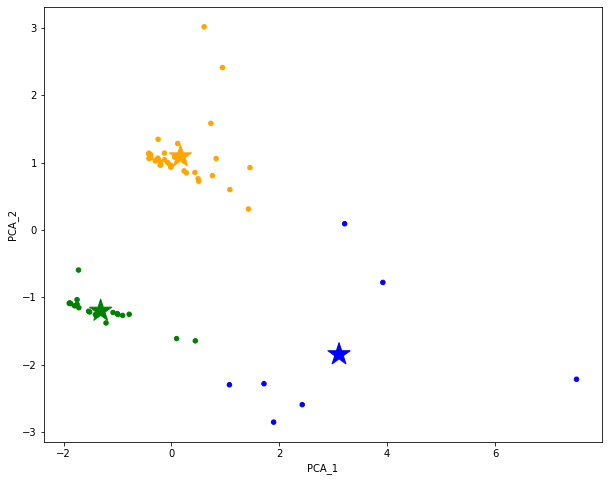

In [299]:
color_map = {0:"blue", 1:"green", 2:'orange'}
features_df['color'] = features_df['cluster'].map(color_map)

ax = features_df.plot(    
    kind="scatter", 
    x="PCA_1",
    y="PCA_2",
    figsize=(10,8),
    c = 'color'
)

centroids.plot(
    kind="scatter", 
    x="PCA_1",
    y="PCA_2", 
    marker="*",
    c=centroids.index.map(color_map),
    s=550,
    ax=ax
)

In [300]:
twitter_dao_final

name  twitter_handle                         twitter_url  \
0        1inch           1inch           https://twitter.com/1inch   
1         Aave        AaveAave        https://twitter.com/AaveAave   
2   Aavegotchi      aavegotchi      https://twitter.com/aavegotchi   
3   Ampleforth   AmpleforthOrg   https://twitter.com/AmpleforthOrg   
4        Armor         ArmorFi         https://twitter.com/ArmorFi   
..         ...             ...                                 ...   
58      Vesper        VesperFi        https://twitter.com/VesperFi   
59       Visor    VisorFinance    https://twitter.com/VisorFinance   
60        WGMI  wgmi4thepeople  https://twitter.com/wgmi4thepeople   
61      yfBeta          yfBeta          https://twitter.com/yfBeta   
62         Yup          yup_io          https://twitter.com/yup_io   

    follower_count       cname  totalProposals  totalVotes  uniqueVoters  \
0        1015150.0       1inch             3.0       214.0         175.0   
1         428464.0        aave            58.0      1790.0         890.0   
2          92203.0  aavegotchi           246.0     77452.0        6512.0   
3          36734.0  ampleforth             0.0         0.0           0.0   
4           7958.0     armorfi             2.0        23.0          20.0   
..             ...         ...             ...         ...           ...   
58         20023.0         vsp            17.0      1212.0         470.0   
59           169.0       visor             0.0         0.0           0.0   
60          4378.0        wgmi             1.0         1.0           1.0   
61          1630.0      yfbeta            14.0       708.0         324.0   
62          6544.0         yup            14.0        36.0          27.0   

                                                icons  \
0   [{'adapter': 'default', 'size': 'large', 'url'...   
1   [{'adapter': 'default', 'size': 'thumb', 'url'...   
2   [{'adapter': 'default', 'size': 'large', 'url'...   
3   [{'adapter': 'default', 'size': 'thumb', 'url'...   
4   [{'adapter': 'default', 'size': 'large', 'url'...   
..                                                ...   
58  [{'adapter': 'default', 'size': 'thumb', 'url'...   
59  [{'adapter': 'default', 'size': 'large', 'url'...   
60  [{'adapter': 'default', 'size': 'thumb', 'url'...   
61  [{'adapter': 'default', 'size': 'thumb', 'url'...   
62  [{'adapter': 'default', 'size': 'thumb', 'url'...   

                                               tokens type  \
0   [{'adapter': 'default', 'symbol': '1inch', 'ne...  DAO   
1   [{'adapter': 'default', 'symbol': 'aave', 'net...  DAO   
2   [{'adapter': 'default', 'symbol': 'ghst', 'net...  DAO   
3   [{'adapter': 'default', 'symbol': 'ampl', 'net...  DAO   
4   [{'adapter': 'default', 'symbol': 'armor', 'ne...  DAO   
..                                                ...  ...   
58  [{'adapter': 'default', 'symbol': 'vsp', 'netw...  DAO   
59  [{'adapter': 'default', 'symbol': 'visr', 'net...  DAO   
60  [{'adapter': 'default', 'symbol': 'wgmi', 'net...  DAO   
61  [{'adapter': 'default', 'symbol': 'yfbeta', 'n...  DAO   
62  [{'adapter': 'default', 'symbol': 'yup', 'netw...  DAO   

    categories_['Investment']  categories_['Media']  categories_['Product']  \
0                           0                     0                       0   
1                           0                     0                       0   
2                           0                     0                       0   
3                           0                     0                       0   
4                           1                     0                       0   
..                        ...                   ...                     ...   
58                          0                     0                       0   
59                          0                     0                       0   
60                          0                     0                       0   
61                          0       

In [301]:
merged = pd.merge(twitter_dao_final, features_df, left_on = ['name'], right_on=['name'])


In [302]:
clusters = merged[['twitter_handle', 'cluster']]

In [303]:
clusters

twitter_handle  cluster
0            1inch        2
1         AaveAave        2
2       aavegotchi        0
3    AmpleforthOrg        2
4          ArmorFi        1
..             ...      ...
58        VesperFi        1
59    VisorFinance        1
60  wgmi4thepeople        1
61          yfBeta        2
62          yup_io        1

[63 rows x 2 columns]

In [304]:
cluster_dict = dict(zip(clusters['twitter_handle'], clusters['cluster']))

In [305]:
tweets['cluster'] = tweets['screen_name']

In [306]:
tweets

level_0  index screen_name  \
0            0      0    1HiveOrg   
1            1      2    1HiveOrg   
2            2      3    1HiveOrg   
3            3      4    1HiveOrg   
4            4      5    1HiveOrg   
...        ...    ...         ...   
23540    23540  34623    MakerDao   
23541    23541  34626    MakerDao   
23542    23542  34631    MakerDao   
23543    23543  34684    MakerDao   
23544    23544  34740    MakerDao   

                                                  tweets  likes  retweets  \
0      1HTV's @vegaypatino shares his perspective on ...      4         1   
1      1HTV is LIVE! 🐝 📺\n\nJoin us for DAOspace news...     11         4   
2      1HTV Monday Stream tomorrow at 11am ET! 📺\n\n-...     18         8   
3      2 hours left!\n\nOur Gnosis Auction is wrappin...     10         3   
4      The bees are stoked for next week! 🔥\n\nTY for...     16         5   
...                                                  ...    ...       ...   
23540  Three weeks ago from today, the Maker Protocol...    119        18   
23541  🥳 Our fren  invites you to participate in a me...     35         5   
23542                                                 gm    344        34   
23543  A series of Governance Polls have been added t...     85        18   
23544  A number of governance polls have been added t...    175        35   

                            time  \
0      2022-02-14 18:59:56+00:00   
1      2022-02-14 16:00:01+00:00   
2      2022-02-13 22:09:15+00:00   
3      2022-02-11 21:10:00+00:00   
4      2022-02-11 20:30:00+00:00   
...                          ...   
23540  2022-02-11 16:25:00+00:00   
23541  2022-02-09 22:22:57+00:00   
23542  2022-02-08 16:07:13+00:00   
23543  2021-05-17 16:10:07+00:00   
23544  2021-03-15 17:05:30+00:00   

                                          tokenized_text  \
0      [1htv, s, vegaypatino, shares, his, perspectiv...   
1      [1htv, is, live, join, us, for, daospace, news...   
2      [1htv, monday, stream, tomorrow, at, 11am, et,...   
3      [2, hours, left, our, gnosis, auction, is, wra...   
4      [the, bees, are, stoked, for, next, week, ty, ...   
...                                                  ...   
23540  [three, weeks, ago, from, today, the, maker, p...   
23541  [our, fren, invites, you, to, participate, in,...   
23542                                               [gm]   
23543  [a, series, of, governance, polls, have, been,...   
23544  [a, number, of, governance, polls, have, been,...   

                                   joined_tokenized_text   cluster  
0      1htv s vegaypatino shares his perspective on f...  1HiveOrg  
1      1htv is live join us for daospace news a chat ...  1HiveOrg  
2      1htv monday stream tomorrow at 11am et daospac...  1HiveOrg  
3      2 hours left our gnosis auction is wrapping up...  1HiveOrg  
4      the bees are stoked for next week ty for the a...  1HiveOrg  
...                                                  ...       ...  
23540  three weeks ago from today the maker protocol ...  MakerDao  
23541  our fren invites you to participate in a meme ...  MakerDao  
23542                                                 gm  MakerDao  
23543  a series of governance polls have been added t...  MakerDao  
23544  a number of governance polls have been added t...  MakerDao  

[23545 rows x 10 columns]

In [307]:
cluster_dict

{'1inch': 2,
 'AaveAave': 2,
 'aavegotchi': 0,
 'AmpleforthOrg': 2,
 'ArmorFi': 1,
 'bprotocoleth': 2,
 'BalancerLabs': 0,
 'bancor': 0,
 'banklessDAO': 0,
 'blockzerolabs': 1,
 'bzxhq': 1,
 'compoundfinance': 2,
 'ConvexFinance': 2,
 'credmarkhq': 1,
 'defidollar': 2,
 'dHedgeOrg': 2,
 'drctoken': 1,
 'dydxprotocol': 2,
 'dsdproject': 2,
 'EarthFund_io': 1,
 'emptysetdollar': 2,
 'ensdomains': 2,
 'feiprotocol': 2,
 'forefront__': 1,
 'FWBtweets': 1,
 'FrontierDAO': 1,
 'gitcoin': 2,
 'gnosisPM': 2,
 'idlefinance': 2,
 'Index_DAO': 0,
 'ndxfi': 2,
 'Instadapp': 2,
 'InverseFinance': 2,
 'Keeper_DAO': 2,
 'Kleros_io': 2,
 'KlimaDAO': 0,
 'KrauseHouseDAO': 1,
 'MANTRADAO': 2,
 'mstable_': 2,
 'OokiTrade': 1,
 'The_OpenDAO': 0,
 'perpprotocol': 2,
 'PieDAO_DeFi': 2,
 'PoolTogether_': 2,
 'powerpoolcvp': 2,
 'PremiaFinance': 1,
 'PrimeDAO_': 1,
 'radicle': 1,
 'rally_io': 1,
 'RariCapital': 2,
 'seen_haus': 1,
 'ShapeShift_io': 2,
 'synthetix_io': 2,
 'graphprotocol': 2,
 'tokenlon': 1,
 

In [308]:
tweets = tweets.replace({"cluster": cluster_dict})

In [309]:
cluster2 = tweets[tweets['cluster'] == 2]

In [310]:
cv = CountVectorizer(stop_words='english')
clust_vect = cv.fit_transform(cluster2['joined_tokenized_text'])
clust_vect_tt = pd.DataFrame(clust_vect.todense(), columns=cv.get_feature_names())

<AxesSubplot:>

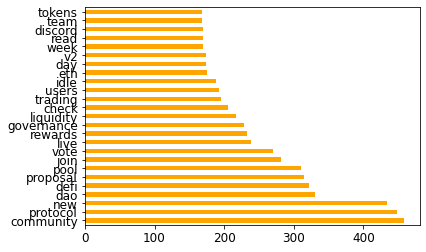

In [311]:
clust_vect_tt.sum().sort_values(ascending=False).head(25).plot(kind='barh', fontsize=12, color = 'orange')

In [312]:
cluster1 = tweets[tweets['cluster'] == 1]

In [313]:
cv = CountVectorizer(stop_words='english')
clust1_vect = cv.fit_transform(cluster1['joined_tokenized_text'])
clust1_vect_tt = pd.DataFrame(clust1_vect.todense(), columns=cv.get_feature_names())

<AxesSubplot:>

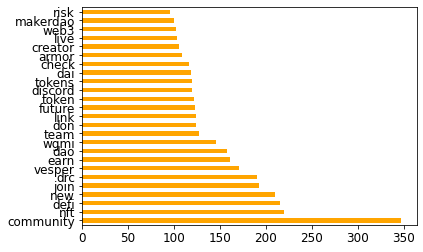

In [314]:
clust1_vect_tt.sum().sort_values(ascending=False).head(25).plot(kind='barh', fontsize=12, color = 'orange')

In [315]:
cluster0 = tweets[tweets['cluster'] == 0]

In [316]:
cv = CountVectorizer(stop_words='english')
clust0_vect = cv.fit_transform(cluster0['joined_tokenized_text'])
clust0_vect_tt = pd.DataFrame(clust0_vect.todense(), columns=cv.get_feature_names())

<AxesSubplot:>

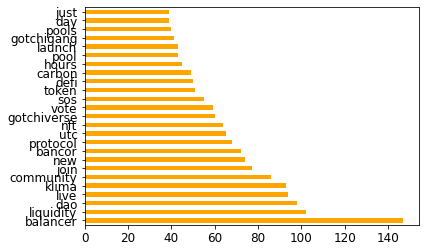

In [317]:
clust0_vect_tt.sum().sort_values(ascending=False).head(25).plot(kind='barh', fontsize=12, color = 'orange')

In [318]:
cluster0

level_0  index  screen_name  \
559        559    800   aavegotchi   
560        560    802   aavegotchi   
561        561    803   aavegotchi   
562        562    804   aavegotchi   
563        563    805   aavegotchi   
...        ...    ...          ...   
15128    15128  22327  The_OpenDAO   
15129    15129  22329  The_OpenDAO   
15130    15130  22342  The_OpenDAO   
15131    15131  22344  The_OpenDAO   
15132    15132  22354  The_OpenDAO   

                                                  tweets  likes  retweets  \
559    BE CAREFUL FRENS 🙏🙏🙏\n\ndon't let the licks wi...     45        15   
560    good guy @coderdannn makin' it RAIN! 👻🌊🌈\n\nMa...     83        16   
561    Coinbase fam get ready for the #Gotchiverse 👻\...    185        44   
562    LFG.mp4 📽️ Enter the #GOTCHIVERSE 🔥\n\nPLAY IT...    412       138   
563       ok i finally made one lol #Web2vsWeb3me #NFTs     155        19   
...                                                  ...    ...       ...   
15128  100K holders on blockchain! Probably nothing!\...   1262       182   
15129                    We just passed 100k holders 🆘🚨    2540       368   
15130             @zerothekidxo Servers down - try later     30         1   
15131             @xbtjk @9x9x9eth Check the website pls      2         0   
15132                            @faded_eth Tmrw u will!     43         0   

                            time  \
559    2022-02-14 11:39:31+00:00   
560    2022-02-13 14:58:33+00:00   
561    2022-02-11 23:34:23+00:00   
562    2022-02-10 14:34:38+00:00   
563    2022-02-10 06:41:37+00:00   
...                          ...   
15128  2021-12-25 09:01:27+00:00   
15129  2021-12-25 08:51:00+00:00   
15130  2021-12-25 03:57:02+00:00   
15131  2021-12-25 03:51:20+00:00   
15132  2021-12-25 03:02:52+00:00   

                                          tokenized_text  \
559    [be, careful, frens, don, t, let, the, licks, ...   
560    [good, guy, coderdannn, makin, it, rain, make,...   
561    [coinbase, fam, get, ready, for, the, gotchive...   
562    [lfg, mp4, enter, the, gotchiverse, play, it, ...   
563    [ok, i, finally, made, one, lol, web2vsweb3me,...   
...                                                  ...   
15128  [100k, holders, on, blockchain, probably, noth...   
15129                  [we, just, passed, 100k, holders]   
15130          [zerothekidxo, servers, down, try, later]   
15131        [xbtjk, 9x9x9eth, check, the, website, pls]   
15132                         [faded_eth, tmrw, u, will]   

                                   joined_tokenized_text cluster  
559    be careful frens don t let the licks win alway...       0  
560    good guy coderdannn makin it rain make sure to...       0  
561    coinbase fam get ready for the gotchiverse now...       0  
562    lfg mp4 enter the gotchiverse play it soon on ...       0  
563          ok i finally made one lol web2vsweb3me nfts       0  
...                                                  ...     ...  
15128  100k holders on blockchain probably nothing we...       0  
15129                        we just passed 100k holders       0  
15130                zerothekidxo servers down try later       0  
15131               xbtjk 9x9x9eth check the website pls       0  
15132                              faded_eth tmrw u will       0  

[923 rows x 10 columns]

In [319]:
merged[merged['cluster'] == 2].describe()

follower_count  totalProposals   totalVotes  uniqueVoters  \
count    3.500000e+01       35.000000    35.000000     35.000000   
mean     1.174554e+05       39.742857  1580.800000    497.657143   
std      2.210789e+05       51.436050  2018.389833    459.921665   
min      1.630000e+03        0.000000     0.000000      0.000000   
25%      1.937900e+04        8.500000   400.500000    172.000000   
50%      3.723000e+04       18.000000   916.000000    323.000000   
75%      1.131650e+05       57.500000  1751.500000    783.000000   
max      1.015150e+06      259.000000  9245.000000   2044.000000   

       categories_['Investment']  categories_['Media']  \
count                       35.0                  35.0   
mean                         0.0                   0.0   
std                          0.0                   0.0   
min                          0.0                   0.0   
25%                          0.0                   0.0   
50%                          0.0                   0.0   
75%                          0.0                   0.0   
max                          0.0                   0.0   

       categories_['Product']  categories_['Protocol']  \
count                    35.0                     35.0   
mean                      0.0                      1.0   
std                       0.0                      0.0   
min                       0.0                      1.0   
25%                       0.0                      1.0   
50%                       0.0                      1.0   
75%                       0.0                      1.0   
max                       0.0                      1.0   

       categories_['Service']  categories_['Social']  \
count                    35.0                   35.0   
mean                      0.0                    0.0   
std                       0.0                    0.0   
min                       0.0                    0.0   
25%                       0.0                    0.0   
50%                       0.0                    0.0   
75%                       0.0                    0.0   
max                       0.0                    0.0   

       categories_['Uncategorized']      PCA_1      PCA_2  cluster  
count                          35.0  35.000000  35.000000     35.0  
mean                            0.0   0.166839   1.090466      2.0  
std                             0.0   0.532104   0.463114      0.0  
min                             0.0  -0.423873   0.310650      2.0  
25%                             0.0  -0.247377   0.927755      2.0  
50%                             0.0  -0.014578   1.024054      2.0  
75%                             0.0   0.498183   1.098689      2.0  
max                             0.0   1.455117   3.016165      2.0

In [320]:
merged[merged['cluster'] == 1].describe()

follower_count  totalProposals   totalVotes  uniqueVoters  \
count       21.000000       21.000000    21.000000     21.000000   
mean     14217.571429       23.428571   758.380952    256.857143   
std      14798.199761       42.157528  1108.228021    351.795294   
min        169.000000        0.000000     0.000000      0.000000   
25%       3870.000000        3.000000    31.000000     25.000000   
50%       7958.000000       10.000000   186.000000     80.000000   
75%      20023.000000       29.000000  1212.000000    405.000000   
max      50654.000000      198.000000  4162.000000   1319.000000   

       categories_['Investment']  categories_['Media']  \
count                  21.000000                  21.0   
mean                    0.047619                   0.0   
std                     0.218218                   0.0   
min                     0.000000                   0.0   
25%                     0.000000                   0.0   
50%                     0.000000                   0.0   
75%                     0.000000                   0.0   
max                     1.000000                   0.0   

       categories_['Product']  categories_['Protocol']  \
count               21.000000                     21.0   
mean                 0.238095                      0.0   
std                  0.436436                      0.0   
min                  0.000000                      0.0   
25%                  0.000000                      0.0   
50%                  0.000000                      0.0   
75%                  0.000000                      0.0   
max                  1.000000                      0.0   

       categories_['Service']  categories_['Social']  \
count                    21.0              21.000000   
mean                      0.0               0.095238   
std                       0.0               0.300793   
min                       0.0               0.000000   
25%                       0.0               0.000000   
50%                       0.0               0.000000   
75%                       0.0               0.000000   
max                       0.0               1.000000   

       categories_['Uncategorized']      PCA_1      PCA_2  cluster  
count                     21.000000  21.000000  21.000000     21.0  
mean                       0.619048  -1.313951  -1.201324      1.0  
std                        0.497613   0.637519   0.210101      0.0  
min                        0.000000  -1.896969  -1.647577      1.0  
25%                        0.000000  -1.751610  -1.256635      1.0  
50%                        1.000000  -1.518214  -1.219438      1.0  
75%                        1.000000  -1.003778  -1.095864      1.0  
max                        1.000000   0.441744  -0.596107      1.0

In [321]:
merged[merged['cluster'] == 0].describe()

follower_count  totalProposals    totalVotes  uniqueVoters  \
count        7.000000        7.000000      7.000000      7.000000   
mean     90171.714286      142.000000  24121.571429   4064.285714   
std      57083.469752      140.628352  24689.612585   2125.946355   
min       1160.000000        9.000000   8437.000000    947.000000   
25%      55579.500000       19.000000   9002.000000   2590.000000   
50%      92203.000000       82.000000  13937.000000   4133.000000   
75%     133687.000000      274.500000  25510.500000   5839.000000   
max     159306.000000      316.000000  77452.000000   6512.000000   

       categories_['Investment']  categories_['Media']  \
count                        7.0              7.000000   
mean                         0.0              0.142857   
std                          0.0              0.377964   
min                          0.0              0.000000   
25%                          0.0              0.000000   
50%                          0.0              0.000000   
75%                          0.0              0.000000   
max                          0.0              1.000000   

       categories_['Product']  categories_['Protocol']  \
count                7.000000                 7.000000   
mean                 0.142857                 0.428571   
std                  0.377964                 0.534522   
min                  0.000000                 0.000000   
25%                  0.000000                 0.000000   
50%                  0.000000                 0.000000   
75%                  0.000000                 1.000000   
max                  1.000000                 1.000000   

       categories_['Service']  categories_['Social']  \
count                7.000000               7.000000   
mean                 0.142857               0.142857   
std                  0.377964               0.377964   
min                  0.000000               0.000000   
25%                  0.000000               0.000000   
50%                  0.000000               0.000000   
75%                  0.000000               0.000000   
max                  1.000000               1.000000   

       categories_['Uncategorized']     PCA_1     PCA_2  cluster  
count                           7.0  7.000000  7.000000      7.0  
mean                            0.0  3.107657 -1.848356      0.0  
std                             0.0  2.163409  1.080418      0.0  
min                             0.0  1.074162 -2.854351      0.0  
25%                             0.0  1.805011 -2.447087      0.0  
50%                             0.0  2.424777 -2.284283      0.0  
75%                             0.0  3.566282 -1.498679      0.0  
max                             0.0  7.512074  0.091673      0.0

In [322]:
merged

name  twitter_handle                         twitter_url  \
0        1inch           1inch           https://twitter.com/1inch   
1         Aave        AaveAave        https://twitter.com/AaveAave   
2   Aavegotchi      aavegotchi      https://twitter.com/aavegotchi   
3   Ampleforth   AmpleforthOrg   https://twitter.com/AmpleforthOrg   
4        Armor         ArmorFi         https://twitter.com/ArmorFi   
..         ...             ...                                 ...   
58      Vesper        VesperFi        https://twitter.com/VesperFi   
59       Visor    VisorFinance    https://twitter.com/VisorFinance   
60        WGMI  wgmi4thepeople  https://twitter.com/wgmi4thepeople   
61      yfBeta          yfBeta          https://twitter.com/yfBeta   
62         Yup          yup_io          https://twitter.com/yup_io   

    follower_count       cname  totalProposals  totalVotes  uniqueVoters  \
0        1015150.0       1inch             3.0       214.0         175.0   
1         428464.0        aave            58.0      1790.0         890.0   
2          92203.0  aavegotchi           246.0     77452.0        6512.0   
3          36734.0  ampleforth             0.0         0.0           0.0   
4           7958.0     armorfi             2.0        23.0          20.0   
..             ...         ...             ...         ...           ...   
58         20023.0         vsp            17.0      1212.0         470.0   
59           169.0       visor             0.0         0.0           0.0   
60          4378.0        wgmi             1.0         1.0           1.0   
61          1630.0      yfbeta            14.0       708.0         324.0   
62          6544.0         yup            14.0        36.0          27.0   

                                                icons  \
0   [{'adapter': 'default', 'size': 'large', 'url'...   
1   [{'adapter': 'default', 'size': 'thumb', 'url'...   
2   [{'adapter': 'default', 'size': 'large', 'url'...   
3   [{'adapter': 'default', 'size': 'thumb', 'url'...   
4   [{'adapter': 'default', 'size': 'large', 'url'...   
..                                                ...   
58  [{'adapter': 'default', 'size': 'thumb', 'url'...   
59  [{'adapter': 'default', 'size': 'large', 'url'...   
60  [{'adapter': 'default', 'size': 'thumb', 'url'...   
61  [{'adapter': 'default', 'size': 'thumb', 'url'...   
62  [{'adapter': 'default', 'size': 'thumb', 'url'...   

                                               tokens  ...  \
0   [{'adapter': 'default', 'symbol': '1inch', 'ne...  ...   
1   [{'adapter': 'default', 'symbol': 'aave', 'net...  ...   
2   [{'adapter': 'default', 'symbol': 'ghst', 'net...  ...   
3   [{'adapter': 'default', 'symbol': 'ampl', 'net...  ...   
4   [{'adapter': 'default', 'symbol': 'armor', 'ne...  ...   
..                                                ...  ...   
58  [{'adapter': 'default', 'symbol': 'vsp', 'netw...  ...   
59  [{'adapter': 'default', 'symbol': 'visr', 'net...  ...   
60  [{'adapter': 'default', 'symbol': 'wgmi', 'net...  ...   
61  [{'adapter': 'default', 'symbol': 'yfbeta', 'n...  ...   
62  [{'adapter': 'default', 'symbol': 'yup', 'netw...  ...   

   categories_['Media']  categories_['Product']  categories_['Protocol']  \
0                     0                       0                        1   
1                     0                       0                        1   
2                     0                       0                        1   
3                     0                       0                        1   
4                     0                       0                        0   
..                  ...                     ...                      ...   
58                    0                       0                        0   
59                    0                       0                        0   
60                    0                       0                        0   
61                    0                       0                   

In [323]:
import matplotlib.pyplot as plt

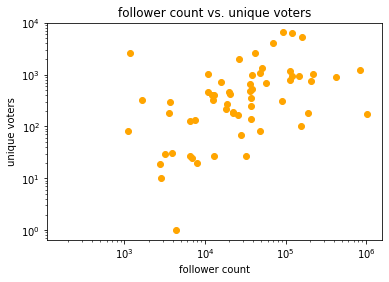

In [324]:
# scatterplot
plt.loglog(merged['follower_count'],
            merged['uniqueVoters'],
            color = 'orange',
            linewidth=0,
            marker="o")
plt.title('follower count vs. unique voters')
plt.xlabel('follower count')
plt.ylabel('unique voters');

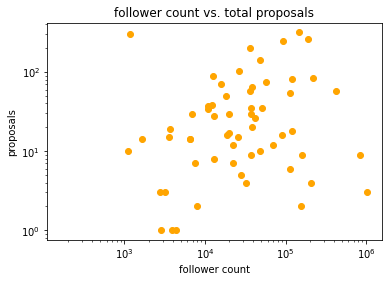

In [325]:
# scatterplot
plt.loglog(merged['follower_count'],
            merged['totalProposals'],
            color = 'orange',
            linewidth=0,
            marker = 'o')
plt.title('follower count vs. total proposals')
plt.xlabel('follower count')
plt.ylabel('proposals');

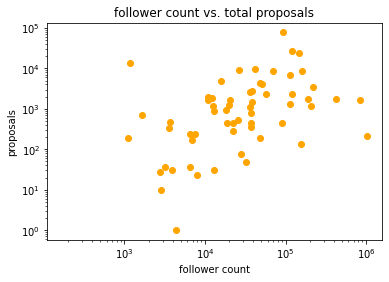

In [326]:
plt.loglog(merged['follower_count'],
            merged['totalVotes'],
            color = 'orange',
            linewidth=0,
            marker='o')
plt.title('follower count vs. total proposals')
plt.xlabel('follower count')
plt.ylabel('proposals');